## Observations and Insights

## Dependencies and starter code

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_results_mean = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_study_results_median = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_study_results_variance = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_study_results_std = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_study_results_sem = mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mouse_study_summary_df = pd.merge(mouse_study_results_mean, mouse_study_results_median, on = 'Drug Regimen')
mouse_study_summary_df = mouse_study_summary_df.rename(columns={'Tumor Volume (mm3)_x':'Mean',
                                                              'Tumor Volume (mm3)_y':'Median'})
mouse_study_summary_df = pd.merge(mouse_study_summary_df, mouse_study_results_variance, on = 'Drug Regimen')
mouse_study_summary_df = mouse_study_summary_df.rename(columns={'Tumor Volume (mm3)':'Variance'})
mouse_study_summary_df = pd.merge(mouse_study_summary_df, mouse_study_results_std, on = 'Drug Regimen')
mouse_study_summary_df = pd.merge(mouse_study_summary_df, mouse_study_results_sem, on = 'Drug Regimen')
mouse_study_summary_df = mouse_study_summary_df.rename(columns={'Tumor Volume (mm3)_x':'Standard Deviation',
                                                                'Tumor Volume (mm3)_y':'SEM'})
mouse_study_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

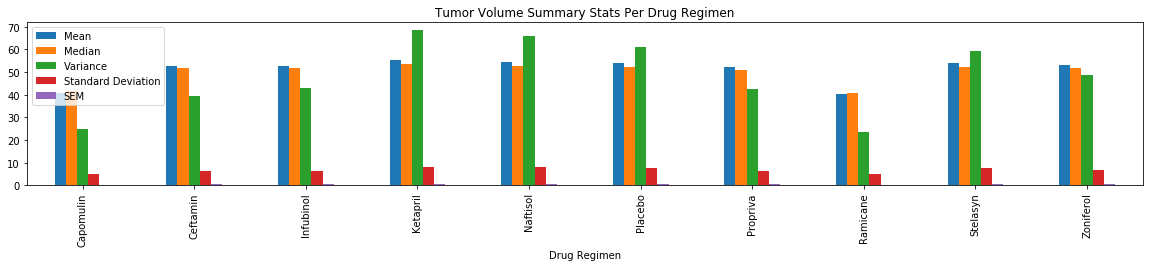

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_study_summary_df.plot(kind='bar', figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Volume Summary Stats Per Drug Regimen")

plt.show()
plt.tight_layout()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

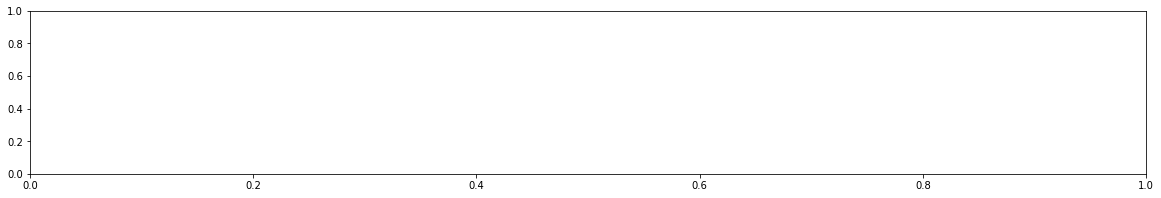

In [47]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(mouse_study_summary_df))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_study_summary_df)
plt.xticks(tick_locations, mouse_study_summary_df["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Tumor Volume Summary Stats Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen